<a href="https://colab.research.google.com/github/josematez/DeepLearning_SkinCancer/blob/main/Testing_Data_Jose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.15.4
!pip install deepdish
#!pip install tensorflow==1.15
#!pip install keras

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import deepdish as dd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical, plot_model
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ReduceLROnPlateau

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ISIC_Dataset')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = dd.io.load('ISIC_dataset.h5')
data_df = pd.DataFrame(data)

In [5]:
X_raw = data_df.image
Y = data_df.cell_type_idx

In [6]:
X = np.zeros((10015, 75, 100, 3))

for i in range(10015):
  X[i,:,:,:] = X_raw[i]

In [7]:
print("Tamaño datos X: {}".format(X.shape))
print("Tamaño datos Y: {}".format(Y.shape))

Tamaño datos X: (10015, 75, 100, 3)
Tamaño datos Y: (10015,)


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [9]:
X_train = (X_train / np.max(X_train))
X_test = (X_test / np.max(X_test))

In [10]:
Y_train = to_categorical(Y_train, num_classes = 7)
Y_test = to_categorical(Y_test, num_classes = 7)

In [11]:
input_shape = (75, 100, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(filters = 128, kernel_size=(5, 5),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(filters = 64, kernel_size=(4, 4), activation='relu',padding = 'Same',))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 100, 128)      9728      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 100, 64)       131136    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 25, 64)        0

In [13]:
epocas = 50
bs = 20
lr = 0.0001
optim = Adam(learning_rate = lr)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
callbacks = [reduce_lr]

In [14]:
historico = model.fit(X_train, Y_train, epochs = epocas, batch_size = bs, validation_split = 0.2, callbacks = callbacks)

Epoch 1/50
281/281 [==============================] - 14s 51ms/step - loss: 1.0686 - accuracy: 0.6742 - val_loss: 1.1024 - val_accuracy: 0.6583
Epoch 2/50
281/281 [==============================] - 14s 51ms/step - loss: 0.9665 - accuracy: 0.6760 - val_loss: 1.0677 - val_accuracy: 0.6569
Epoch 3/50
281/281 [==============================] - 14s 51ms/step - loss: 0.9235 - accuracy: 0.6762 - val_loss: 1.0220 - val_accuracy: 0.6548
Epoch 4/50
281/281 [==============================] - 14s 51ms/step - loss: 0.9038 - accuracy: 0.6842 - val_loss: 0.9525 - val_accuracy: 0.6698
Epoch 5/50
281/281 [==============================] - 14s 51ms/step - loss: 0.8800 - accuracy: 0.6896 - val_loss: 0.9155 - val_accuracy: 0.6790
Epoch 6/50
281/281 [==============================] - 14s 50ms/step - loss: 0.8567 - accuracy: 0.6908 - val_loss: 0.9139 - val_accuracy: 0.6762
Epoch 7/50
281/281 [==============================] - 14s 50ms/step - loss: 0.8387 - accuracy: 0.6960 - val_loss: 0.9056 - val_accuracy:

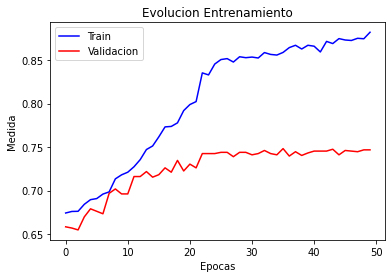

In [15]:
plt.plot(historico.history['accuracy'], c = 'b')
plt.plot(historico.history['val_accuracy'], c = 'r')
plt.legend(['Train', 'Validacion'])
plt.xlabel('Epocas')
plt.ylabel('Medida')
plt.title('Evolucion Entrenamiento')
plt.show()

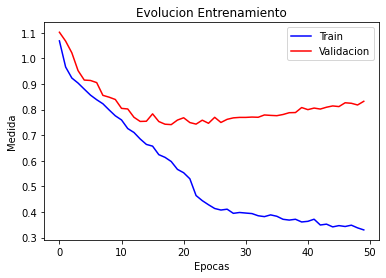

In [16]:
plt.plot(historico.history['loss'], c = 'b')
plt.plot(historico.history['val_loss'], c = 'r')
plt.legend(['Train', 'Validacion'])
plt.xlabel('Epocas')
plt.ylabel('Medida')
plt.title('Evolucion Entrenamiento')
plt.show()

In [17]:
metricas = model.evaluate(X_test, Y_test)

94/94 [==============================] - 2s 19ms/step - loss: 0.7954 - accuracy: 0.7501
